# Nx versus T and OA

In [61]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
from pathlib import Path
from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing, ds2df_echam
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log
from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter
log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

In [63]:

import numpy as np



In [64]:
plot_path = Path('Plots')

In [65]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_all_years_echam_noresm_{case}_{_x}_{_y}-ATTO_ukesm.png'
    return plot_path /f

In [66]:
plot_path.mkdir(exist_ok=True, parents=True)

# Load observational data: 

In [67]:
import pandas as pd

In [68]:
from bs_fdbck.constants import path_measurement_data

In [69]:
fn = path_measurement_data /'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))

df_hyy_1.head()

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )



In [70]:
fn = path_measurement_data /'SourceData_Yli_Juuti2021.xls'

df_hyy_2 = pd.read_excel(fn, sheet_name=2, header=2, usecols=range(6))

df_hyy_2.head()

df_hyy_2['date'] = df_hyy_2.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_2['date'] = pd.to_datetime(df_hyy_2['date'] )

df_hyy_2

df_hyy_2['date'] = df_hyy_2.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_2['date'] = pd.to_datetime(df_hyy_2['date'] )

df_hyy_2 = df_hyy_2.set_index('date')

In [71]:
df_hyy_2

year  month  day  T (degree C)  AOD_340 nm  AOD_500 nm
date                                                              
2012-07-02  2012      7    2     16.753083    0.117652    0.065783
2012-07-03  2012      7    3     17.366916    0.148389    0.082933
2012-07-04  2012      7    4     18.099667    0.144905    0.078666
2012-07-06  2012      7    6     18.627832    0.173471    0.087554
2012-07-20  2012      7   20     13.770333    0.149718    0.090444
...          ...    ...  ...           ...         ...         ...
2018-08-08  2018      8    8     20.297500    0.084738    0.047252
2018-08-16  2018      8   16     17.330334    0.229233    0.149357
2018-08-19  2018      8   19     15.192917    0.088741    0.056444
2018-08-21  2018      8   21     11.036416    0.108817    0.073775
2018-08-29  2018      8   29     15.028000    0.211001    0.150221

[70 rows x 6 columns]

In [72]:
df_hyy_1 = df_hyy_1.set_index('date')

In [73]:
df_hyy_1 = pd.merge(df_hyy_1,df_hyy_2[['AOD_340 nm','AOD_500 nm']], left_index=True, right_index=True,how="outer",)

In [74]:
df_hyy_1.index = df_hyy_1.index.rename('time')

In [75]:
df_hyy_1.head()

year  month  day  T (degree C)  OA (microgram m^-3)  N100 (cm^-3)  \
time                                                                            
2012-07-01  2012      7    1     17.308417             3.014541    781.245471   
2012-07-02  2012      7    2     16.753084             1.697459    635.103339   
2012-07-03  2012      7    3     17.366917             2.350536    745.212064   
2012-07-04  2012      7    4     18.099667             2.118566    734.009356   
2012-07-05  2012      7    5     19.267666             3.413631   1019.238450   

            AOD_340 nm  AOD_500 nm  
time                                
2012-07-01         NaN         NaN  
2012-07-02    0.117652    0.065783  
2012-07-03    0.148389    0.082933  
2012-07-04    0.144905    0.078666  
2012-07-05         NaN         NaN

In [76]:
from bs_fdbck.util.EBAS_data import get_ebas_dataset_Nx_daily_JA_median_df



#ds_ebas_Nx = get_ebas_dataset_with_Nx()

df_ebas_Nx, ds_ebas_Nx = get_ebas_dataset_Nx_daily_JA_median_df()#x_list = [90,100,110,120])

Importing files: 
[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20120101000000.20181205100800.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20130101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20140101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20150101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20160101000000.2022022

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/missing.py:559: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/missing.py:560: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/missing.py:559: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/missing.py:560: 

N50     1228.322309
N80      749.329136
N100     526.205688
N150     269.913105
N200     100.141185
N250      37.727342
N300      21.488844
JA         1.000000
dtype: float64


/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:260: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_JA.mean()
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:263: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_JA.median())


In [77]:
fn = path_measurement_data /'SourceData_Yli_Juuti2021.xls'

df_hyy_1y = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(7,12),nrows=7)

df_hyy_1y.head()
df_hyy_1y= df_hyy_1y.rename({'year.1':'year',
                            'T (degree C).1':'T (degree C)',
                             'OA (microgram m^-3).1':'OA (microgram m^-3)',
                             'N100 (cm^-3).1':'N100 (cm^-3)'
                            }, axis=1)
#df_hyy_1y['year'] = pd.to_datetime(df_hyy_1y['year'].apply(x:str(x)))

df_hyy_1y

/tmp/ipykernel_1892/1180385910.py:3: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  df_hyy_1y = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(7,12),nrows=7)


year  T (degree C)  OA (microgram m^-3)  N100 (cm^-3)
0  2012     14.819834             2.286611    485.015920
1  2013     16.061833             2.266324    458.851509
2  2014     18.469334             4.102861    706.239261
3  2015     14.949500             2.167607    499.026618
4  2016     13.959500             1.693031    418.417730
5  2017     13.619333             1.845648    409.297699
6  2018     17.848833             3.366803    770.183131

In [78]:
df_hyy_1y['year'] = df_hyy_1y['year'].apply(lambda x:f'{x:.0f}')

df_hyy_1y['date'] = df_hyy_1y['year']
df_hyy_1y = df_hyy_1y.set_index('date')



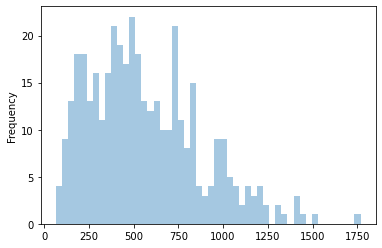

In [79]:
df_hyy_1['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')

plt.show()



## Why is my method 20% off their method? Is it integration?

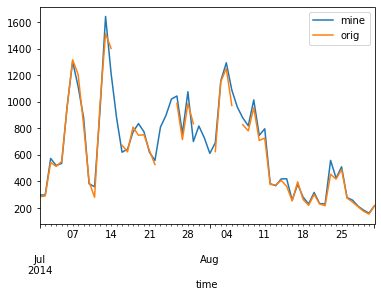

1.0223825237517035


In [80]:

df_joint_hyy = pd.merge(df_ebas_Nx, df_hyy_1, left_index=True, right_index=True)
(df_joint_hyy['N100']).loc['2014-07':'2014-09'].plot(label='mine')
(df_joint_hyy['N100 (cm^-3)']).loc['2014-07':'2014-09'].plot(label='orig')
plt.legend()
plt.show()



print(df_joint_hyy['N100'][df_joint_hyy['N100 (cm^-3)'].notnull()].mean()/df_joint_hyy['N100 (cm^-3)'].mean())

# Read in model data:

### Some definitions:

In [81]:
models = ['NorESM','ECHAM-SALSA','UKESM']

In [82]:
dic_mod2case={

}

## Settings:

In [83]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [84]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [85]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [86]:
dic_mod_ca = dict()
dic_df_mod_case = dict()
dic_dfsm_mod_case = dict()

### LOAD ECHAM SALSA

In [87]:



case_name = 'SALSA_BSOA_feedback'
case_name_echam = 'SALSA_BSOA_feedback'

time_res = 'hour'
space_res='locations'
model_name='ECHAM-SALSA'

dic_mod2case[model_name] = case_name_echam

### Settings:

In [88]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [89]:
case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_echam = [case_name]

In [90]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-11-23 09:29:23,064 useful_scit  INFO     TIMES:****: 2012-01-01 2019-01-01


2022-11-23 09:29:23,064 useful_scit  INFO     TIMES:****: 2012-01-01 2019-01-01


### Variables

In [91]:
varl =[
      'apm',
'geom',
'airdens',
'tempair',
'uw',
'vw',
'ccn02',
'ccn10',
'cod',
'cwp',
'ceff',
'ceff_ct',
'lcdnc',
'lcdnc_ct',
'clfr',
'cl_time',
'aot550nm',
'aot865nm',
'ang550865',
'up_sw',
'up_sw_cs',
'up_sw_noa',
'up_sw_cs_noa',
'up_lw',
'up_lw_cs',
'up_lw_noa',
'up_lw_cs_noa',
'mmrtrN500',
'mmrtrN250',
'mmrtrN200',
'mmrtrN100',
'mmrtrN50',
'mmrtrN3',
'oh_con',
'emi_monot_bio',
'emi_isop_bio',
'SO2_gas',
'APIN_gas',
'TBETAOCI_gas',
'BPIN_gas',
'LIMON_gas',
'SABIN_gas',
'MYRC_gas',
'CARENE3_gas',
'ISOP_gas',
'VBS0_gas',
'VBS1_gas',
'VBS10_gas',
'ORG_mass',
      
      
      ] 

In [92]:
for case_name in cases_echam:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

In [93]:
dic_ds = dict()
for ca in cases_echam:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.drop('station').rename(dict(locations='station'))

2022-11-23 09:29:23,258 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_f

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

In [94]:
dic_mod_ca['ECHAM-SALSA'] = dic_ds.copy()

## LOAD UKESM


In [95]:



case_name = 'CRES'
case_name_ukesm = 'CRES'

time_res = 'hour'
space_res='locations'
model_name='UKESM'

dic_mod2case[model_name] = case_name_ukesm

### Settings:

In [96]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [97]:
case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_ukesm = [case_name]

In [98]:

log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-11-23 09:29:25,449 useful_scit  INFO     TIMES:****: 2012-01-01 2015-01-01


2022-11-23 09:29:25,449 useful_scit  INFO     TIMES:****: 2012-01-01 2015-01-01


### Variables

In [99]:
varl =[
    'tas',
    'sfmmroa',
      ]

In [100]:
for case_name in cases_ukesm:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/tas_CRES_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/sfmmroa_CRES_2012-01-01_2015-01-01_hour_locations.nc
UUUPS


In [101]:
dic_ds = dict()
for ca in cases_ukesm:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.copy()

2022-11-23 09:29:25,574 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/tas_CRES_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/sfmmroa_CRES_2012-01-01_2015-01-01_hour_locations.nc]


//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/tas_CRES_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/sfmmroa_CRES_2012-01-01_2015-01-01_hour_locations.nc
2022-11-23 09:29:25,574 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/tas_CRES_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/sfmmroa_CRES_2012-01-01_2015-01-01_hour_locations.nc]
['//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/tas_CRES_2012-01-01_2015-01-01_hour_locations.nc', '//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/sfmmroa_CRES_2012-01-01_2015-01-01_hour_locations.nc']


In [102]:
ds

<xarray.Dataset>
Dimensions:  (time: 30592, station: 7)
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 ... 2014-12-31T18:00:00
    height   float64 1.5
  * station  (station) object 'SMR' 'HTM' 'VHL' 'BIR' 'ATTO' 'SGP' 'SMR4'
Data variables:
    sfmmroa  (station, time) float32 dask.array<chunksize=(7, 30592), meta=np.ndarray>
    tas      (station, time) float32 dask.array<chunksize=(7, 30592), meta=np.ndarray>

In [103]:
dic_mod_ca['UKESM'] = dic_ds.copy()

## LOAD NORESM

## Settings:

In [104]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [105]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [106]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [107]:
cases_noresm1 = ['OsloAero_intBVOC_f09_f09_mg17_full']
cases_noresm2 = ['OsloAero_intBVOC_f09_f09_mg17_ssp245']

In [108]:
case_mod = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
case_noresm = 'OsloAero_intBVOC_f09_f09_mg17_fssp'

In [109]:
model_name = 'NorESM'

dic_mod2case[model_name] = case_noresm

## Variables

In [110]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene',
      ]


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T',
       'NCONC01','N50','N150','N200',#'DOD500',
       #'NCONC01',
       #'SFisoprene',
       #'SFmonoterp',
       #'DOD500',
      'SFmonoterp','SFisoprene',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [111]:
for case_name in cases_noresm1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [112]:
for case_name in cases_noresm2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [113]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-11-23 09:29:26,227 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [114]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-11-23 09:29:27,011 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [115]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [116]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [117]:
case_mod

'OsloAero_intBVOC_f09_f09_mg17_fssp'

In [118]:
dic_ds = {case_mod: ds_comb}

In [119]:
dic_mod_ca['NorESM'] = dic_ds.copy()

## SELECT STATION:


In [120]:
for mod in dic_mod_ca.keys():
    print(mod)
    for ca in dic_mod_ca[mod].keys():
        print(ca)
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].sel(station='ATTO')
        dic_mod_ca[mod][ca].load()

ECHAM-SALSA
SALSA_BSOA_feedback
UKESM
CRES
NorESM
OsloAero_intBVOC_f09_f09_mg17_fssp


In [121]:
_ds =dic_mod_ca['ECHAM-SALSA']['SALSA_BSOA_feedback']

In [122]:
_ds =dic_mod_ca['NorESM'][case_noresm]

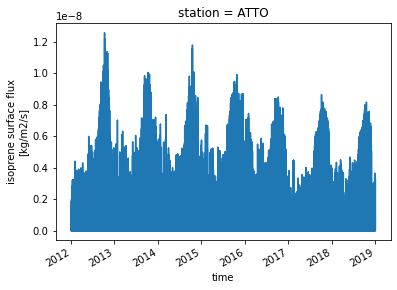

In [123]:
_ds['SFisoprene'].plot()

# Adjust models

## ECHAM-SALSA

In [124]:
rn_dict_echam={
    'ORG_mass_conc' : 'OA',
    'tempair':'T',

    
}

In [125]:
model_lev_i=-1

In [126]:
from bs_fdbck.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median

In [127]:
dic_mod_ca['ECHAM-SALSA'][case_name_echam]

<xarray.Dataset>
Dimensions:        (time: 61368, lev: 47)
Coordinates:
  * time           (time) datetime64[ns] 2012-01-01T00:52:30 ... 2018-12-31T2...
  * lev            (lev) float64 1.0 2.0 3.0 4.0 5.0 ... 44.0 45.0 46.0 47.0
    station        <U4 'ATTO'
Data variables: (12/50)
    lon            (time) float64 -59.0 -59.0 -59.0 -59.0 ... -59.0 -59.0 -59.0
    APIN_gas       (time, lev) float32 8.128e-44 2.242e-44 ... 1.979e-10
    BPIN_gas       (time, lev) float32 1.331e-43 4.064e-44 ... 1.653e-10
    CARENE3_gas    (time, lev) float32 8.828e-44 2.382e-44 ... 3.523e-11
    ISOP_gas       (time, lev) float32 1.191e-43 3.924e-44 ... 4.105e-09
    LIMON_gas      (time, lev) float32 8.128e-44 2.242e-44 ... 6.632e-11
    ...             ...
    up_sw          (time) float32 65.74 65.74 63.56 63.56 ... 94.67 43.71 43.71
    up_sw_cs       (time) float32 35.55 35.55 35.56 35.56 ... 82.31 39.69 39.69
    up_sw_cs_noa   (time) float32 31.78 31.78 31.79 31.79 ... 67.69 32.18 32.18
    up_sw_noa      (time) float32 66.43 66.43 64.31 64.31 ... 82.65 37.72 37.72
    uw             (time, lev) float32 0.9518 -25.03 -16.63 ... -2.34 -1.16
    vw             (time, lev) float32 10.78 19.8 27.7 ... -3.482 -1.649 -0.1798

In [128]:

df, df_sm = ds2df_echam(dic_mod_ca['ECHAM-SALSA'][case_name_echam], summer_months=range(13))

N3
N50
N100
N200
N250
N500
ORG_mass_conc
VBS1_gas_conc
VBS0_gas_conc
VBS10_gas_conc
cwp


In [129]:
df.columns

Index(['lon', 'APIN_gas', 'BPIN_gas', 'CARENE3_gas', 'ISOP_gas', 'LIMON_gas',
       'MYRC_gas', 'ORG_mass', 'SABIN_gas', 'SO2_gas', 'TBETAOCI_gas',
       'VBS0_gas', 'VBS10_gas', 'VBS1_gas', 'airdens', 'ang550865', 'aot550nm',
       'aot865nm', 'apm', 'ccn02', 'ccn10', 'ceff', 'ceff_ct', 'cl_time',
       'clfr', 'cod', 'cwp_orig', 'emi_isop_bio', 'emi_monot_bio', 'geom',
       'lcdnc', 'lcdnc_ct', 'mmrtrN250', 'mmrtrN3', 'mmrtrN500', 'oh_con',
       'mmrtrN100', 'mmrtrN200', 'mmrtrN50', 'T', 'up_lw', 'up_lw_cs',
       'up_lw_cs_noa', 'up_lw_noa', 'up_sw', 'up_sw_cs', 'up_sw_cs_noa',
       'up_sw_noa', 'uw', 'vw', 'N3', 'N50', 'N100', 'N200', 'N250', 'N500',
       'OA', 'VBS1_gas_conc', 'VBS0_gas_conc', 'VBS10_gas_conc', 'OAG', 'cwp',
       'ceff_um', 'lcdnc_cm3', 'T_C', 'month', 'ismonth0', 'ismonth1',
       'ismonth2', 'ismonth3', 'ismonth4', 'ismonth5', 'ismonth6', 'ismonth7',
       'ismonth8', 'ismonth9', 'ismonth10', 'ismonth11', 'ismonth12', 'isJuly',
       'isAug', '

In [130]:

_di = {case_name_echam:df}
_dism = {case_name_echam:df_sm}

dic_df_mod_case['ECHAM-SALSA']= _di.copy()
dic_dfsm_mod_case['ECHAM-SALSA'] = _dism.copy()

## UKESM

In [131]:
from bs_fdbck.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median, ds2df_ukesm

In [132]:
dic_mod_ca['UKESM']

{'CRES': <xarray.Dataset>
 Dimensions:  (time: 30592)
 Coordinates:
   * time     (time) datetime64[ns] 2012-01-01 ... 2014-12-31T18:00:00
     height   float64 1.5
     station  <U4 'ATTO'
 Data variables:
     sfmmroa  (time) float32 2.407e-09 nan nan ... 2.327e-09 2.15e-09 1.554e-09
     tas      (time) float32 nan 305.1 304.3 303.6 302.8 ... nan nan nan nan nan}

In [133]:
df, df_sm = ds2df_ukesm(dic_mod_ca['UKESM'][case_name_ukesm],summer_months=range(13))

In [134]:

_di = {case_name_ukesm:df}
_dism = {case_name_ukesm:df_sm}

dic_df_mod_case['UKESM']= _di.copy()
dic_dfsm_mod_case['UKESM'] = _dism.copy()

## NorESM

In [135]:


dic_df_sm, dic_df = ds2df_inc_preprocessing(dic_mod_ca['NorESM'], model_lev_i=-1, return_summer_median=True, summer_months=range(13))


dic_df_mod_case['NorESM'] = dic_df.copy()
dic_dfsm_mod_case['NorESM'] = dic_df_sm.copy()

hey
-1
SO4_A1
SO4_A2
SO4_AC
SO4_NA
SO4_PR


## Merge with observations:

In [136]:
dic_df_pre = dict()#dic_df_mod_case.copy()#deep=True)
for mod in dic_df_mod_case.keys():
    dic_df_pre[mod] = dic_df_mod_case[mod].copy()

In [137]:
for mod in dic_df_mod_case.keys():
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        dic_df_mod_case[mod][ca] = pd.merge(dic_df_pre[mod][ca], df_hyy_1, right_on='time', left_on='time', how='outer')
        dic_df_mod_case[mod][ca]['year'] = dic_df_mod_case[mod][ca].index.year

ECHAM-SALSA
UKESM
NorESM


In [138]:
def add_log(df, varl=None):
    if varl is None:
        varl = ['OA','N100', 'OA (microgram m^-3)','N100 (cm^-3)','N50','N150','N200']
    var_exist = df.columns
    
    varl_f = set(varl).intersection(var_exist)
    print(varl_f)
    for v in varl_f:
        df[f'log10({v})'] = np.log10(df[v])
    return df


for mod in dic_df_mod_case.keys():
    for c in dic_df_mod_case[mod].keys():
    
        dic_df_mod_case[mod][c] = add_log(dic_df_mod_case[mod][c])
        dic_dfsm_mod_case[mod][c] = add_log(dic_dfsm_mod_case[mod][c])
        
df_joint_hyy = add_log(df_joint_hyy)

{'N200', 'OA (microgram m^-3)', 'N100', 'N100 (cm^-3)', 'OA', 'N50'}
{'N200', 'OA', 'N100', 'N50'}
{'OA (microgram m^-3)', 'N100 (cm^-3)', 'OA'}
{'OA'}
{'N200', 'OA (microgram m^-3)', 'N100', 'N100 (cm^-3)', 'N150', 'OA', 'N50'}
{'N200', 'N100', 'N150', 'OA', 'N50'}
{'N200', 'OA (microgram m^-3)', 'N100', 'N100 (cm^-3)', 'N150', 'N50'}


In [139]:
mod='NorESM'

In [140]:
ca = case_mod

In [141]:
mask_obs_N = dic_df_mod_case[mod][ca]['N100 (cm^-3)'].notnull()
mask_obs_OA = dic_df_mod_case[mod][ca]['OA (microgram m^-3)'].notnull()

# Plots

In [142]:
from bs_fdbck.util.plot.BSOA_plots import cdic_model

In [143]:
import seaborn as sns

In [144]:
cdic_model[mod]

'#d8651e'

In [145]:
from matplotlib import pyplot as plt, gridspec as gridspec

In [146]:
from bs_fdbck.util.plot.BSOA_plots import make_cool_grid2, make_cool_grid3

import scipy

### Fit funcs

In [147]:
from bs_fdbck.util.BSOA_datamanip.fits import *

### season to month

In [148]:
season2month = dict(WET       = [1,2,3,4,5,6,7,          12],
                    WET_mid   =   [2,3,4,5],
                    WET_early = [1,2,3,                  12],
                    WET_late  =       [4,5,6,7],
                    DRY       =               [8,9,10,11],
                    DRY_early =           [6,7,8], 
                    DRY_late  =                 [9,10,11,12],
                   
                   
                  )

In [149]:
def select_months(df, season = None, month_list=None):
    if season is not None: 
        month_list = season2month[season]
    

    df['month'] = df.index.month
    return df['month'].isin(month_list)

In [150]:
from bs_fdbck.util.plot.BSOA_plots import cdic_model

## DRY:

## Redo surface emissions: 

In [151]:
_df = dic_df_mod_case['ECHAM-SALSA'][case_name_echam]

<AxesSubplot:xlabel='time'>

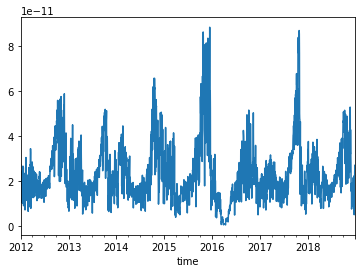

In [152]:
_df['emi_isop_bio'].plot()

#### Linear

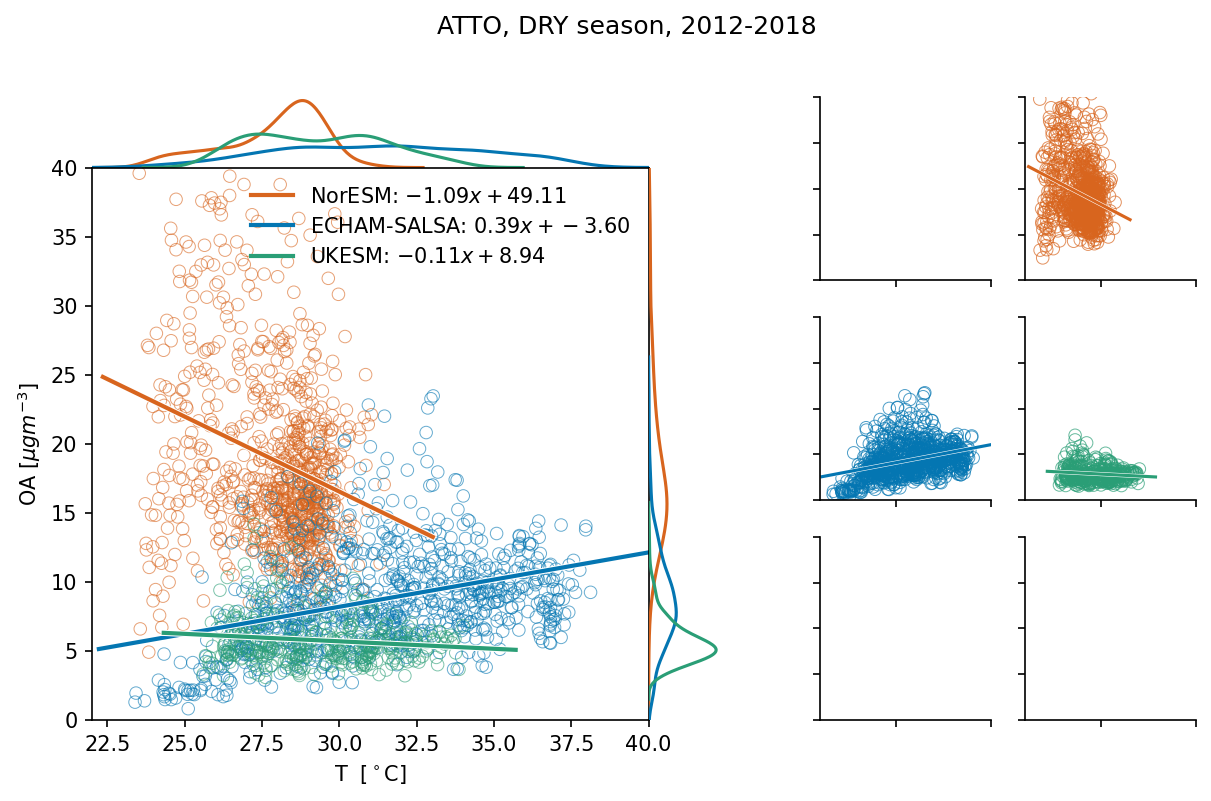

In [153]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
fig, ax, daxs, axs_extra = make_cool_grid3(ncols_extra=2, nrows_extra=3,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()
#ax = axsaxs_extra

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'


xlims = [22,40]
ylims = [0,40]


season='DRY'






# OBS: 

v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
mo = 'Observations'


df_s = df_joint_hyy#.loc['2012':'2014']
"""
mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],
                    zorder=-10,

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__'
               )
popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
#ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)

"""

# NORESM: 
v_x = 'T_C'
v_y = 'OA'

for mo, ax_ex in zip(models, axs_extra[1:]):
    ca= dic_mod2case[mo]
    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )


    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()

    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)



for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)

fn = make_fn_scat(f'exp_fit1_{season}', v_x, v_y)
ax.legend(frameon=False)

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

#### Exponential 

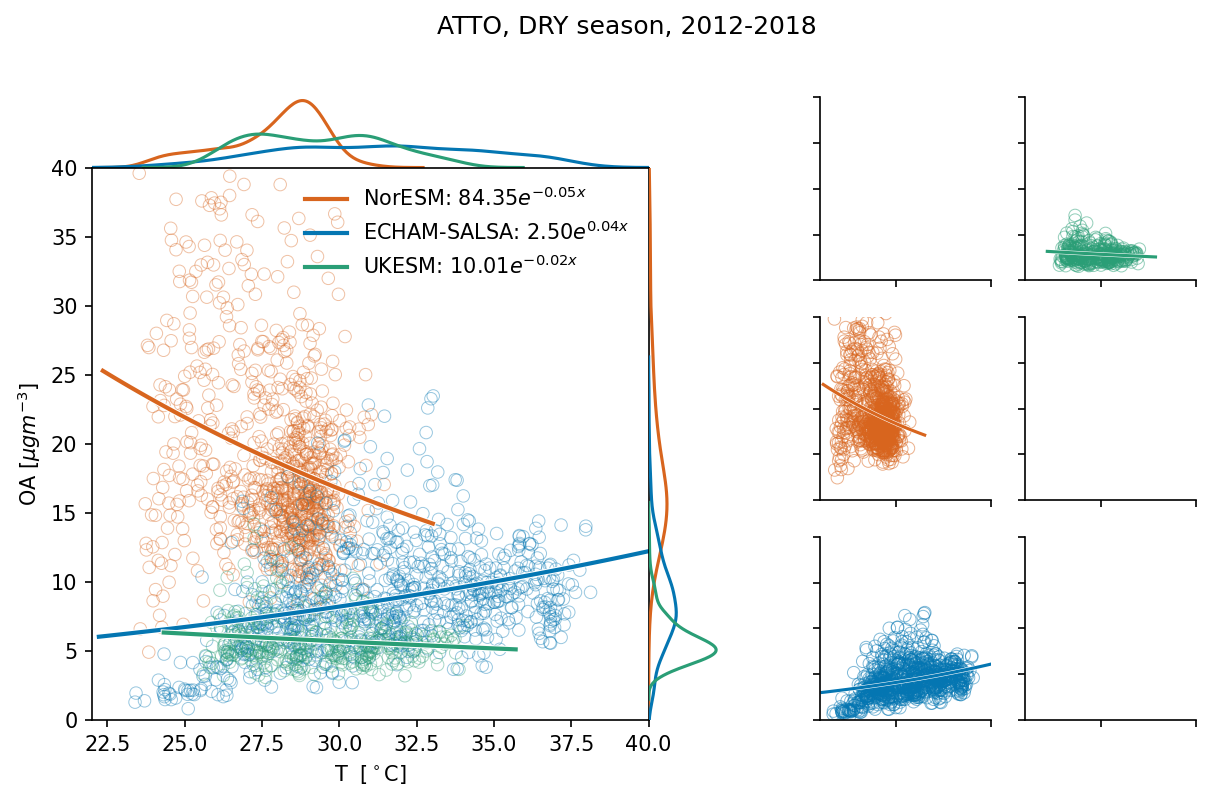

In [154]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
fig, ax, daxs, axs_extra = make_cool_grid3(ncols_extra=2, nrows_extra=3,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.T.flatten()
#ax = axsaxs_extra

## Settings
alpha_scatt = 0.4

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'


xlims = [22,40]
ylims = [0,40]


season='DRY'






# OBS: 

v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
mo = 'Observations'


df_s = df_joint_hyy#.loc['2012':'2014']
"""
mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],
                    zorder=-10,

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__'
               )
popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
#ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)

"""

# NORESM: 
v_x = 'T_C'
v_y = 'OA'

for mo, ax_ex in zip(models, axs_extra[1:]):
    ca= dic_mod2case[mo]
    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo],
                    
                    
                   )

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )


    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()

    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)



for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)

fn = make_fn_scat(f'exp_fit1_{season}', v_x, v_y)
ax.legend(frameon=False)

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

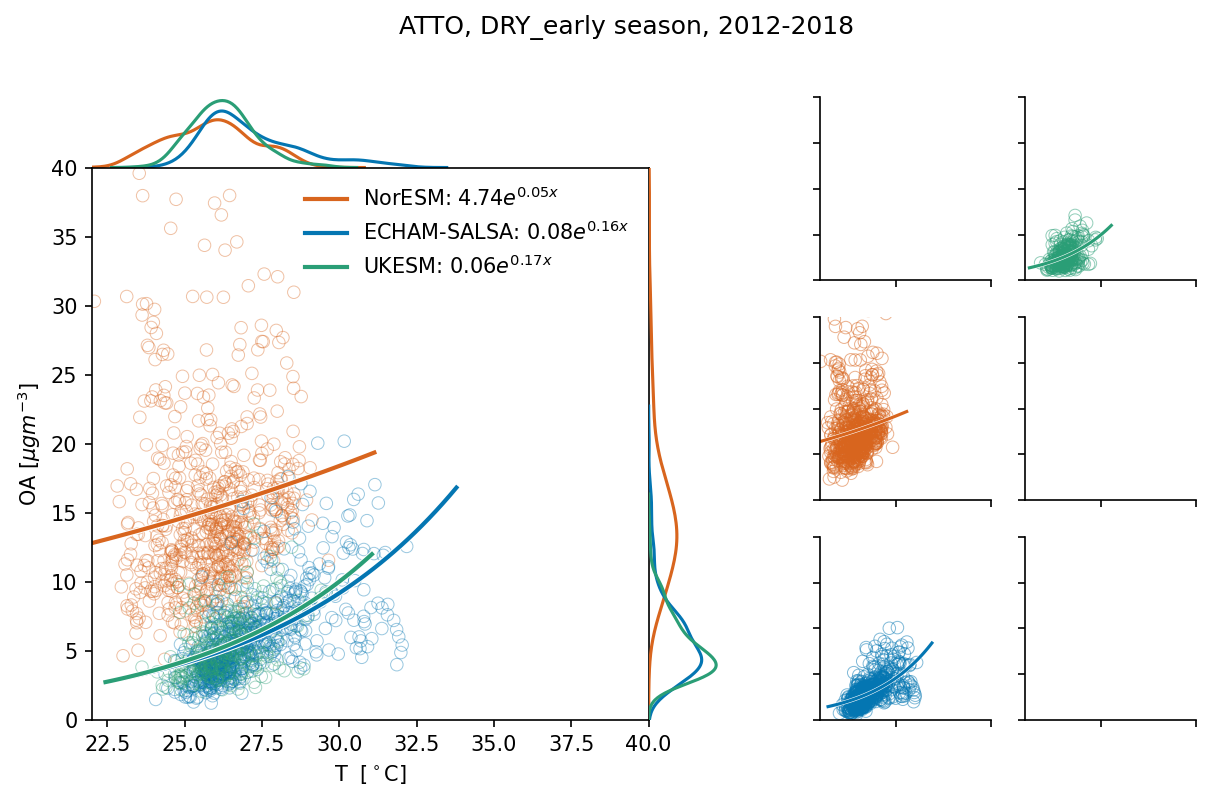

In [155]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
fig, ax, daxs, axs_extra = make_cool_grid3(ncols_extra=2, nrows_extra=3,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.T.flatten()
#ax = axsaxs_extra

## Settings
alpha_scatt = 0.4

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'


xlims = [22,40]
ylims = [0,40]


season='DRY_early'






# OBS: 

v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
mo = 'Observations'


df_s = df_joint_hyy#.loc['2012':'2014']
"""
mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],
                    zorder=-10,

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__'
               )
popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
#ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)

"""

# NORESM: 
v_x = 'T_C'
v_y = 'OA'

for mo, ax_ex in zip(models, axs_extra[1:]):
    ca= dic_mod2case[mo]
    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo],
                    
                    
                   )

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )


    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()

    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)



for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)

fn = make_fn_scat(f'exp_fit1_{season}', v_x, v_y)
ax.legend(frameon=False)

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

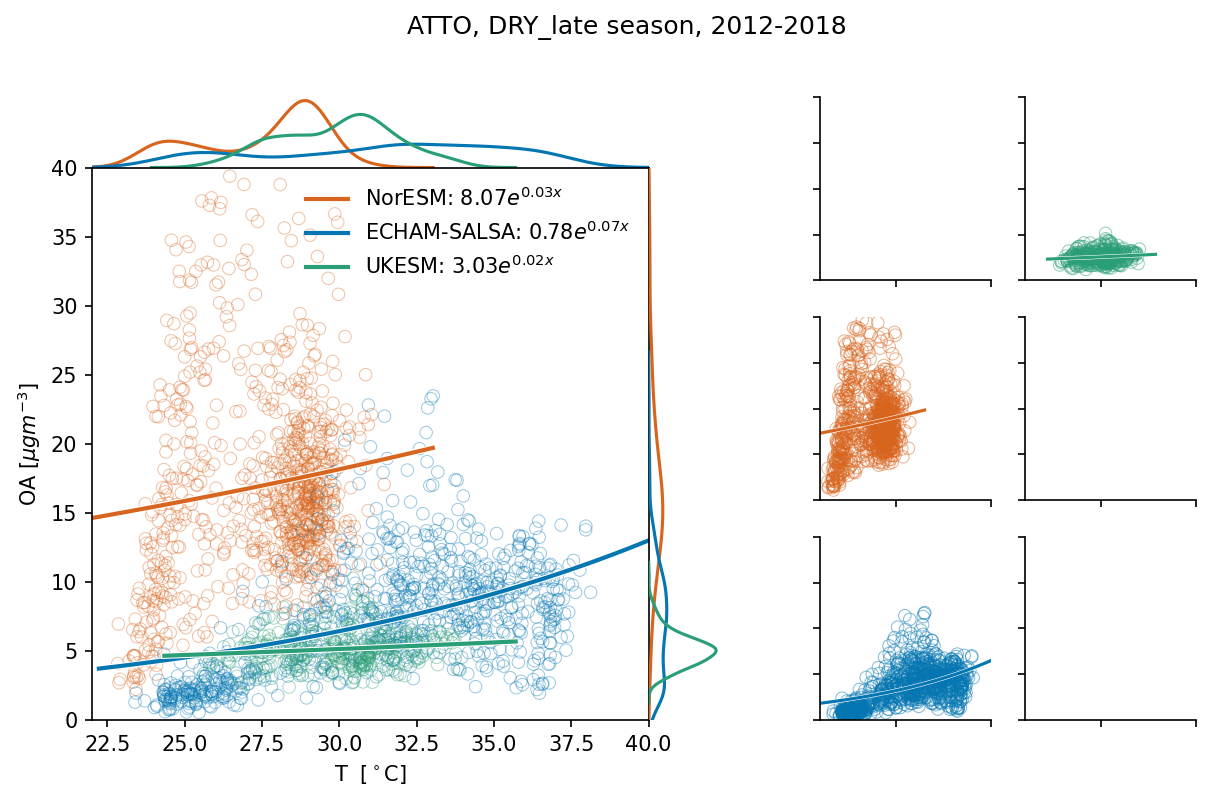

In [156]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
fig, ax, daxs, axs_extra = make_cool_grid3(ncols_extra=2, nrows_extra=3,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.T.flatten()
#ax = axsaxs_extra

## Settings
alpha_scatt = 0.4

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'


xlims = [22,40]
ylims = [0,40]


season='DRY_late'






# OBS: 

v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
mo = 'Observations'


df_s = df_joint_hyy#.loc['2012':'2014']
"""
mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],
                    zorder=-10,

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__'
               )
popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
#ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)

"""

# NORESM: 
v_x = 'T_C'
v_y = 'OA'

for mo, ax_ex in zip(models, axs_extra[1:]):
    ca= dic_mod2case[mo]
    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo],
                    
                    
                   )

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )


    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()

    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)



for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)

fn = make_fn_scat(f'exp_fit1_{season}', v_x, v_y)
ax.legend(frameon=False)

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

## Wet season

#### Linear

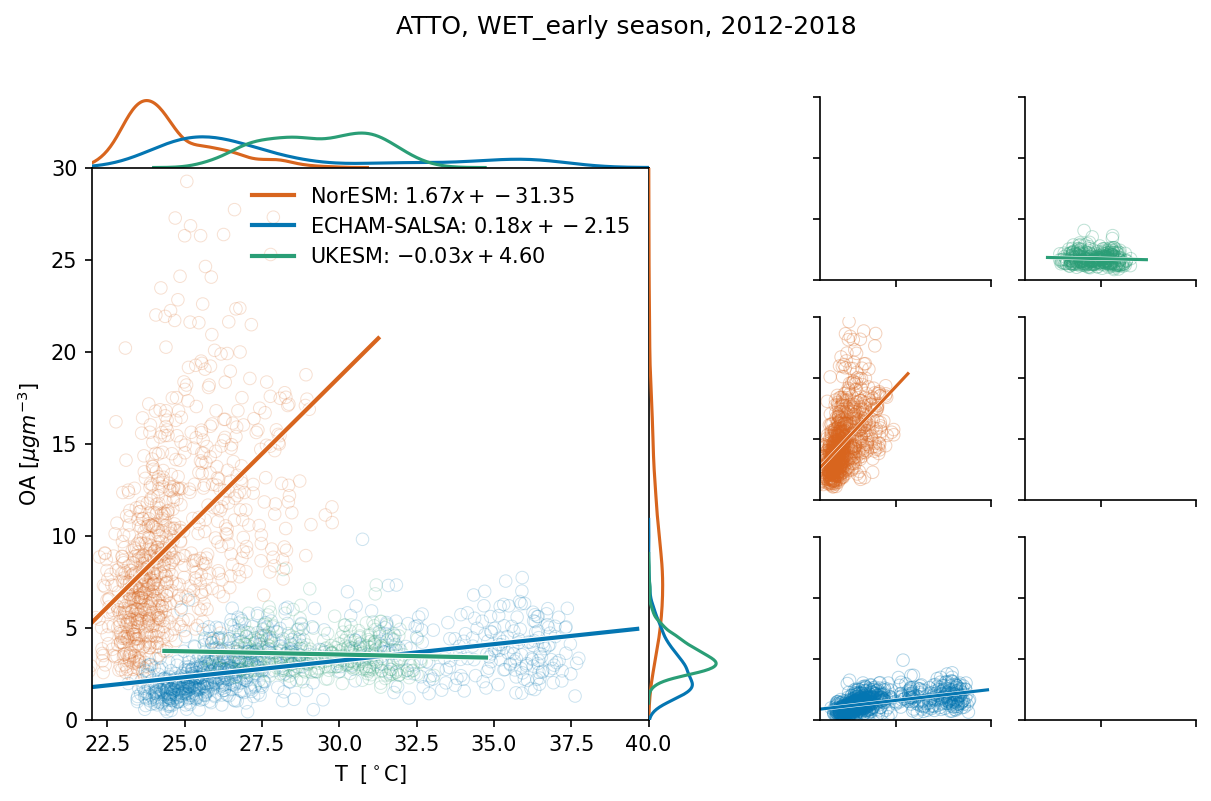

In [157]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
fig, ax, daxs, axs_extra = make_cool_grid3(ncols_extra=2, nrows_extra=3,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.T.flatten()
#ax = axsaxs_extra

## Settings
alpha_scatt = 0.2

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'


xlims = [22,40]
ylims = [0,30]


season='WET_early'






# OBS: 

v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
mo = 'Observations'


df_s = df_joint_hyy#.loc['2012':'2014']
"""
mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],
                    zorder=-10,

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__'
               )
popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
#ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)

"""

# NORESM: 
v_x = 'T_C'
v_y = 'OA'

for mo, ax_ex in zip(models, axs_extra[1:]):
    ca= dic_mod2case[mo]
    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )


    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()

    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)



for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)

fn = make_fn_scat(f'lin_fit1_{season}', v_x, v_y)
ax.legend(frameon=False)

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

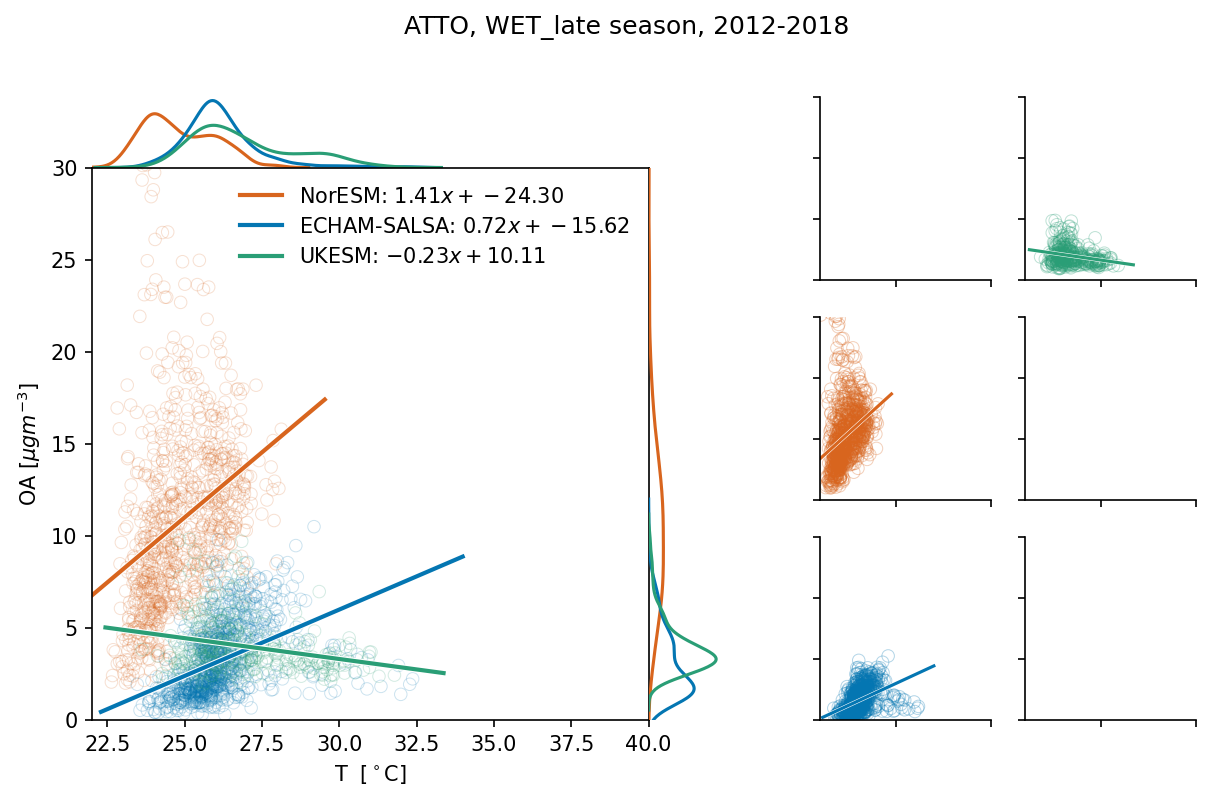

In [158]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
fig, ax, daxs, axs_extra = make_cool_grid3(ncols_extra=2, nrows_extra=3,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.T.flatten()
#ax = axsaxs_extra

## Settings
alpha_scatt = 0.2

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'


xlims = [22,40]
ylims = [0,30]


season='WET_late'






# OBS: 

v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
mo = 'Observations'


df_s = df_joint_hyy#.loc['2012':'2014']
"""
mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],
                    zorder=-10,

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__'
               )
popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
#ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)

"""

# NORESM: 
v_x = 'T_C'
v_y = 'OA'

for mo, ax_ex in zip(models, axs_extra[1:]):
    ca= dic_mod2case[mo]
    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )


    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()

    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)



for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)

fn = make_fn_scat(f'lin_fit1_{season}', v_x, v_y)
ax.legend(frameon=False)

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

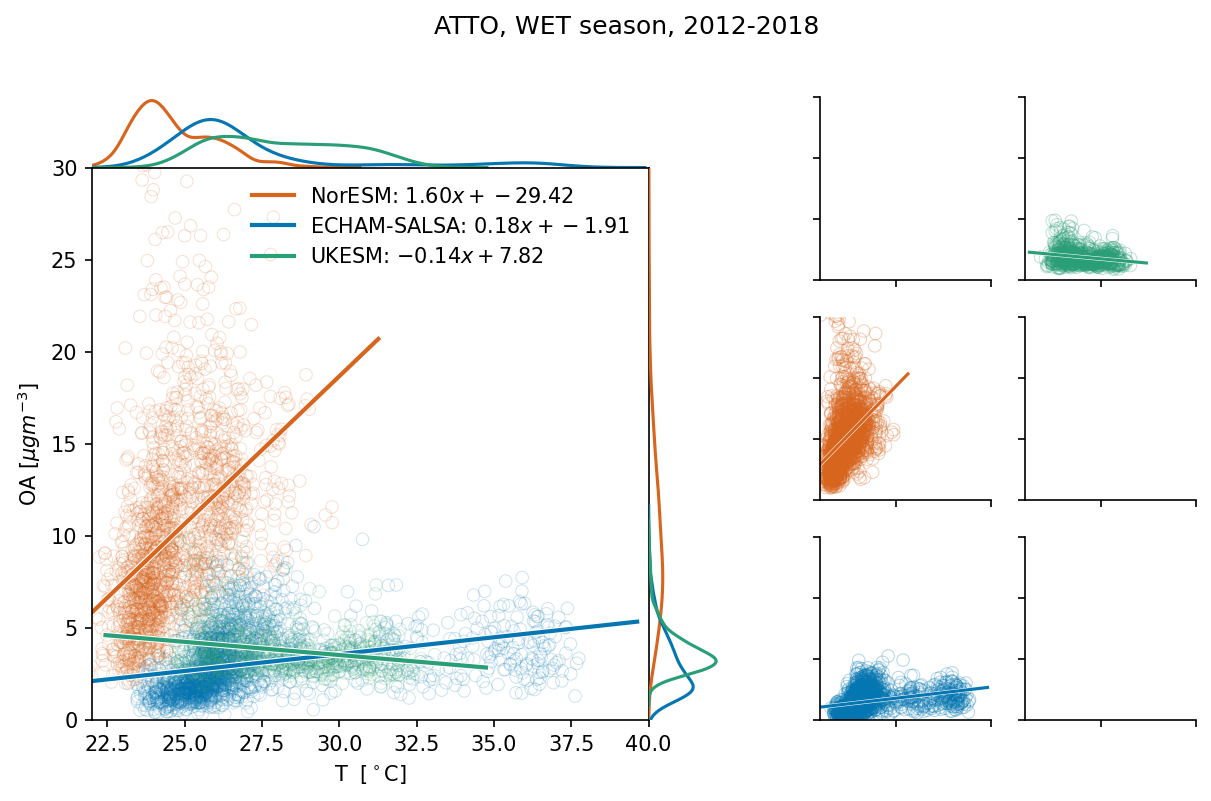

In [159]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
fig, ax, daxs, axs_extra = make_cool_grid3(ncols_extra=2, nrows_extra=3,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.T.flatten()
#ax = axsaxs_extra

## Settings
alpha_scatt = 0.2

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'


xlims = [22,40]
ylims = [0,30]


season='WET'






# OBS: 

v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
mo = 'Observations'


df_s = df_joint_hyy#.loc['2012':'2014']
"""
mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],
                    zorder=-10,

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__'
               )
popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
#ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)

"""

# NORESM: 
v_x = 'T_C'
v_y = 'OA'

for mo, ax_ex in zip(models, axs_extra[1:]):
    ca= dic_mod2case[mo]
    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )


    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()

    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)



for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)

fn = make_fn_scat(f'lin_fit1_{season}', v_x, v_y)
ax.legend(frameon=False)

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

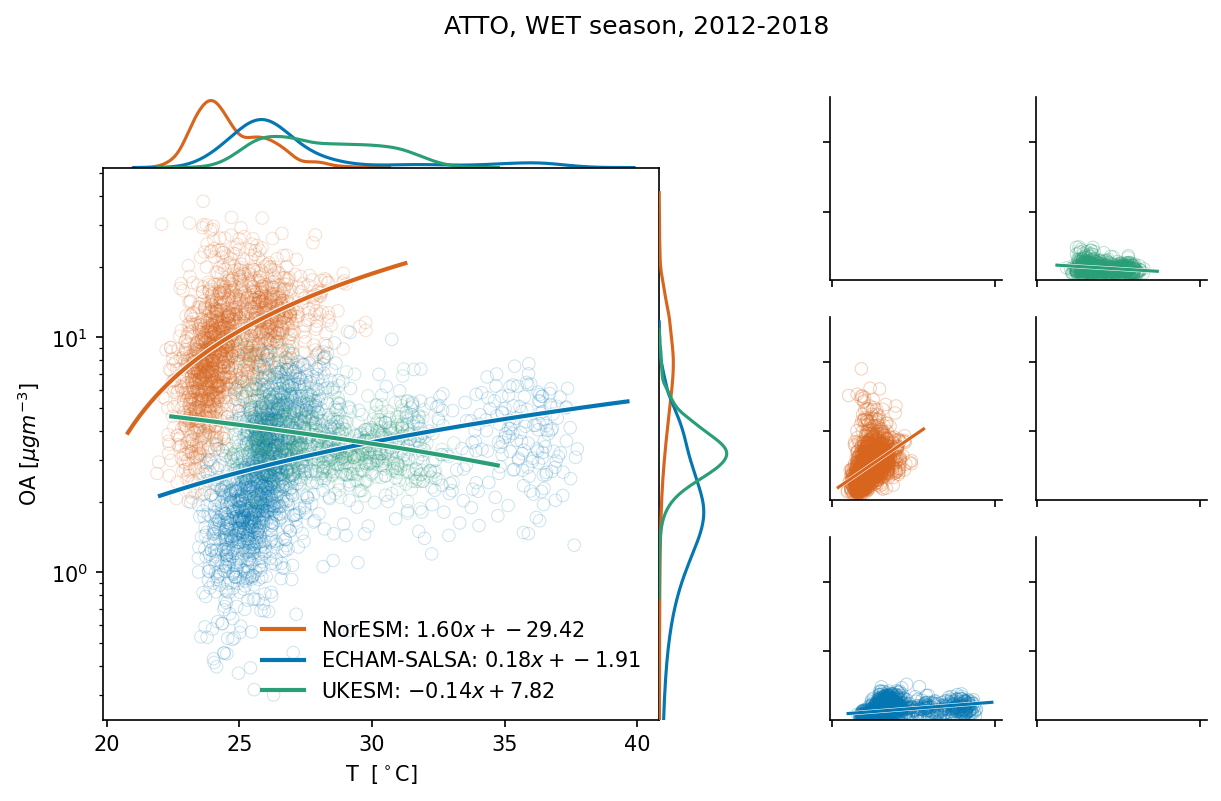

In [160]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
fig, ax, daxs, axs_extra = make_cool_grid3(ncols_extra=2, nrows_extra=3,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.T.flatten()
#ax = axsaxs_extra

## Settings
alpha_scatt = 0.2

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'


xlims = [22,40]
ylims = [.1,30]


season='WET'






# OBS: 

v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
mo = 'Observations'


df_s = df_joint_hyy#.loc['2012':'2014']
"""
mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],
                    zorder=-10,

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__'
               )
popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
#ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)

"""

# NORESM: 
v_x = 'T_C'
v_y = 'OA'

for mo, ax_ex in zip(models, axs_extra[1:]):
    ca= dic_mod2case[mo]
    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )


    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()

    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

#ax.set_ylim(ylims)
#ax.set_xlim(xlims)
ax.set_yscale('log')


for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)

fn = make_fn_scat(f'lin_fit1_logscale{season}', v_x, v_y)
ax.legend(frameon=False)

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

#### Exponential fit

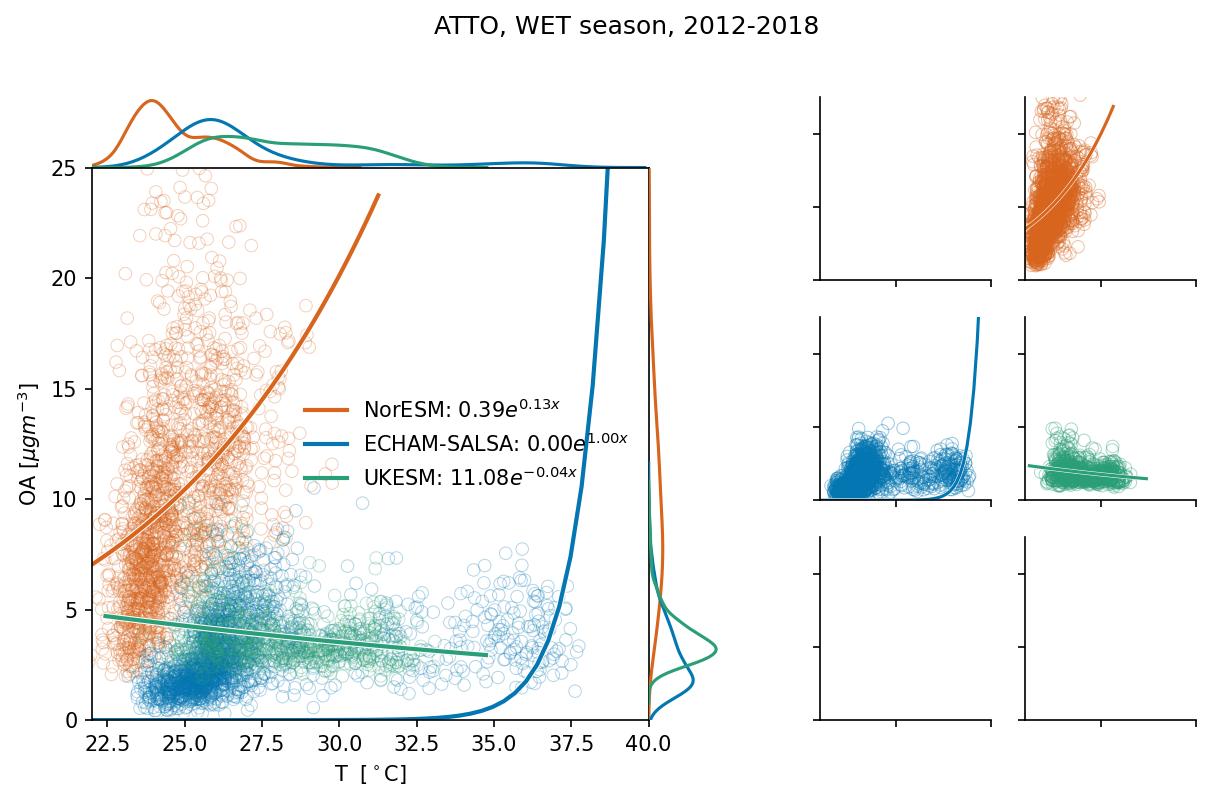

In [161]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
fig, ax, daxs, axs_extra = make_cool_grid3(ncols_extra=2, nrows_extra=3,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()
#ax = axsaxs_extra

## Settings
alpha_scatt = 0.3

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'


xlims = [22,40]
ylims = [0,25]


season='WET'






# OBS: 

v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
mo = 'Observations'


df_s = df_joint_hyy#.loc['2012':'2014']
"""
mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],
                    zorder=-10,

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__'
               )
popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
#ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)

"""

# NORESM: 
v_x = 'T_C'
v_y = 'OA'

for mo, ax_ex in zip(models, axs_extra[1:]):
    ca= dic_mod2case[mo]
    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )


    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()

    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)



for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)

fn = make_fn_scat(f'exp_fit1_{season}', v_x, v_y)
ax.legend(frameon=False)

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

## WET_early

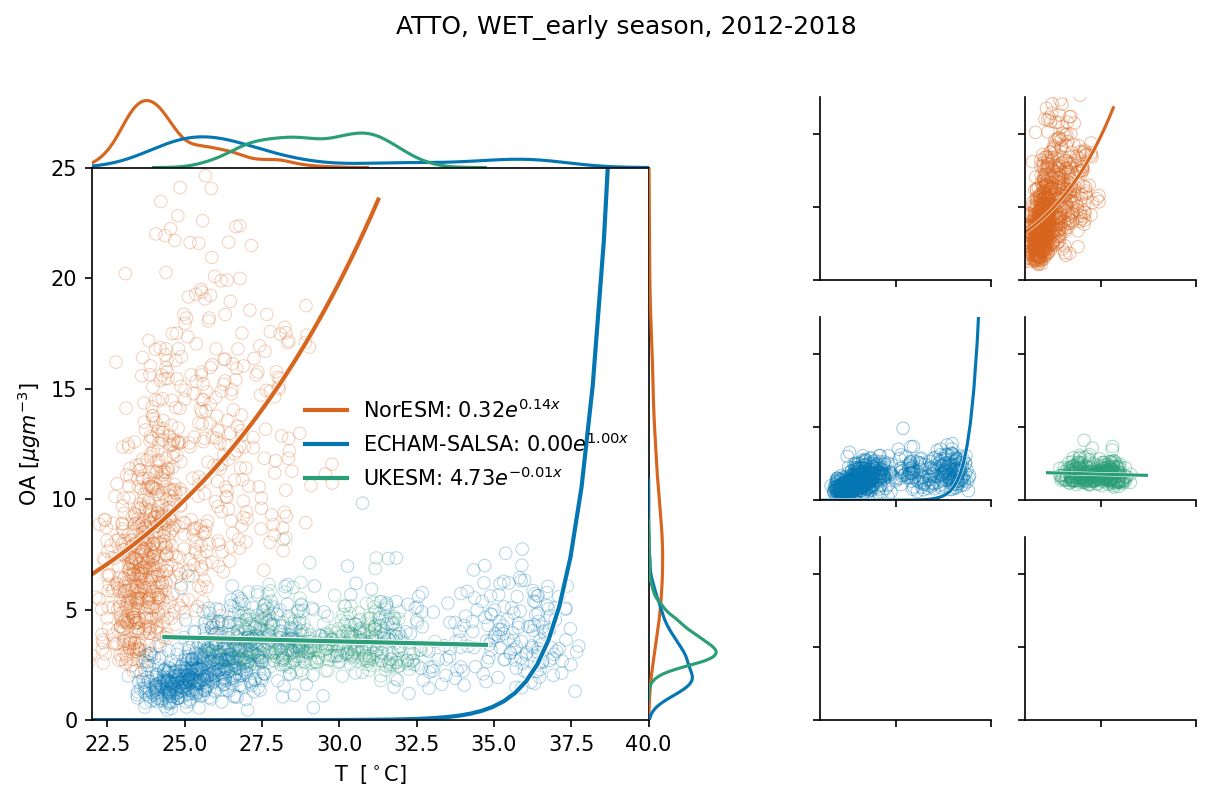

In [162]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
fig, ax, daxs, axs_extra = make_cool_grid3(ncols_extra=2, nrows_extra=3,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()
#ax = axsaxs_extra

## Settings
alpha_scatt = 0.3

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'


xlims = [22,40]
ylims = [0,25]


season='WET_early'






# OBS: 

v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
mo = 'Observations'


df_s = df_joint_hyy#.loc['2012':'2014']
"""
mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],
                    zorder=-10,

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__'
               )
popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
#ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)

"""

# NORESM: 
v_x = 'T_C'
v_y = 'OA'

for mo, ax_ex in zip(models, axs_extra[1:]):
    ca= dic_mod2case[mo]
    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )


    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()

    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)



for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)

fn = make_fn_scat(f'exp_fit1_{season}', v_x, v_y)
ax.legend(frameon=False)

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

## WET_late

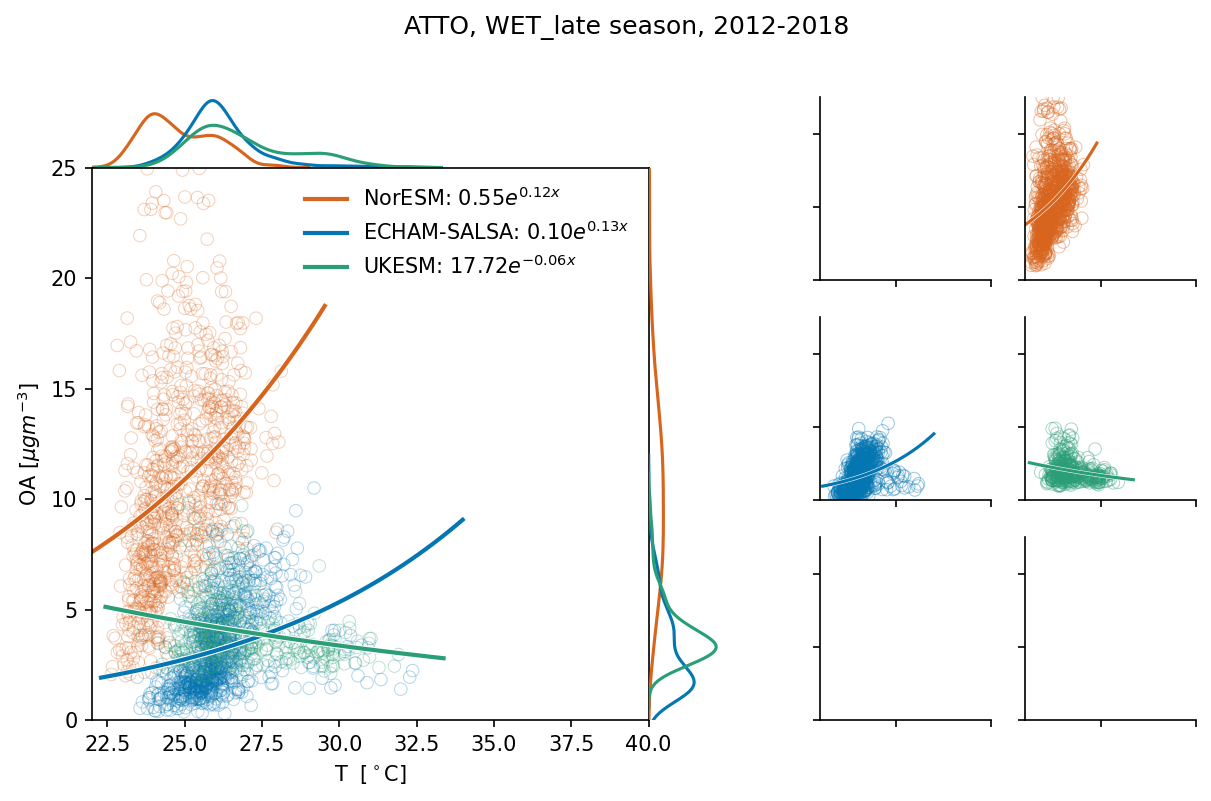

In [163]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
fig, ax, daxs, axs_extra = make_cool_grid3(ncols_extra=2, nrows_extra=3,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()
#ax = axsaxs_extra

## Settings
alpha_scatt = 0.3

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'


xlims = [22,40]
ylims = [0,25]


season='WET_late'






# OBS: 

v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
mo = 'Observations'


df_s = df_joint_hyy#.loc['2012':'2014']
"""
mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],
                    zorder=-10,

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__'
               )
popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
#ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)

"""

# NORESM: 
v_x = 'T_C'
v_y = 'OA'

for mo, ax_ex in zip(models, axs_extra[1:]):
    ca= dic_mod2case[mo]
    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )


    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()

    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)



for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)

fn = make_fn_scat(f'exp_fit1_{season}', v_x, v_y)
ax.legend(frameon=False)

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

## Dry_early

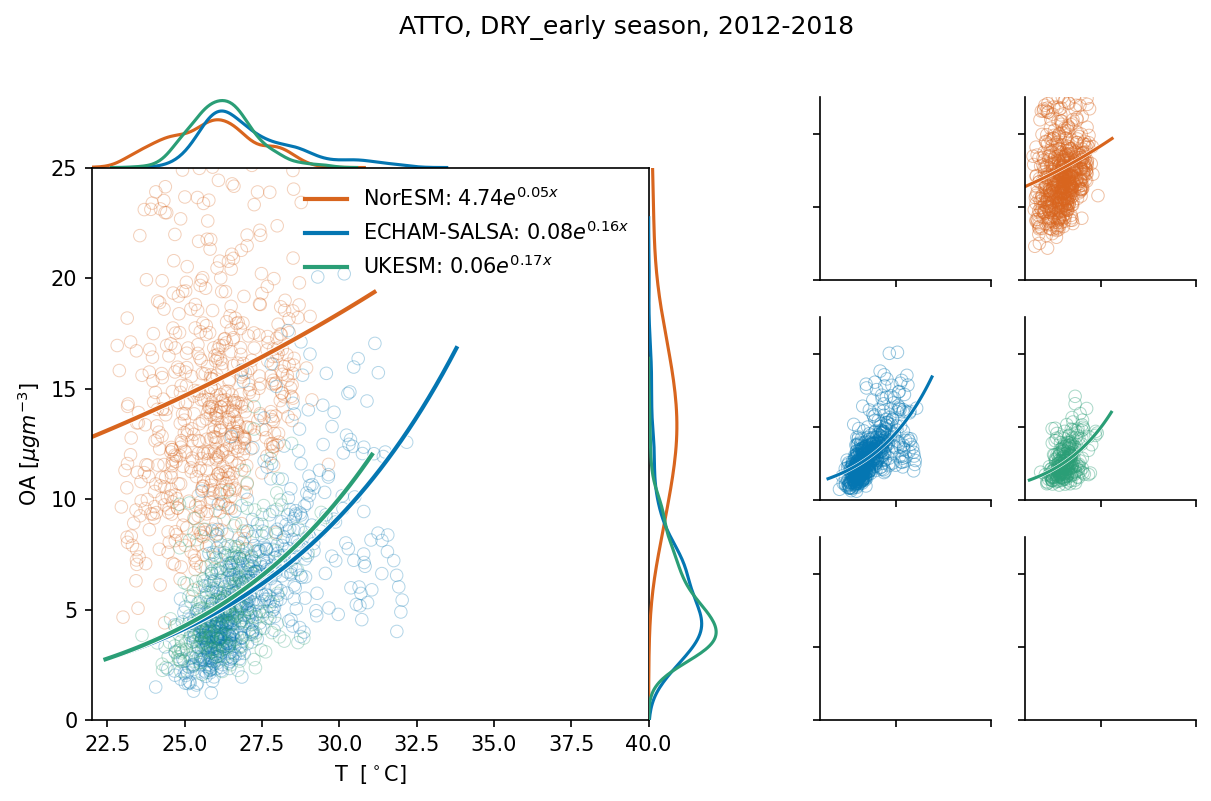

In [164]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
fig, ax, daxs, axs_extra = make_cool_grid3(ncols_extra=2, nrows_extra=3,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()
#ax = axsaxs_extra

## Settings
alpha_scatt = 0.3

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'


xlims = [22,40]
ylims = [0,25]


season='DRY_early'






# OBS: 

v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
mo = 'Observations'


df_s = df_joint_hyy#.loc['2012':'2014']
"""
mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],
                    zorder=-10,

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__'
               )
popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
#ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)

"""

# NORESM: 
v_x = 'T_C'
v_y = 'OA'

for mo, ax_ex in zip(models, axs_extra[1:]):
    ca= dic_mod2case[mo]
    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )


    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()

    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)



for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)

fn = make_fn_scat(f'exp_fit1_{season}', v_x, v_y)
ax.legend(frameon=False)

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

## Dry_late

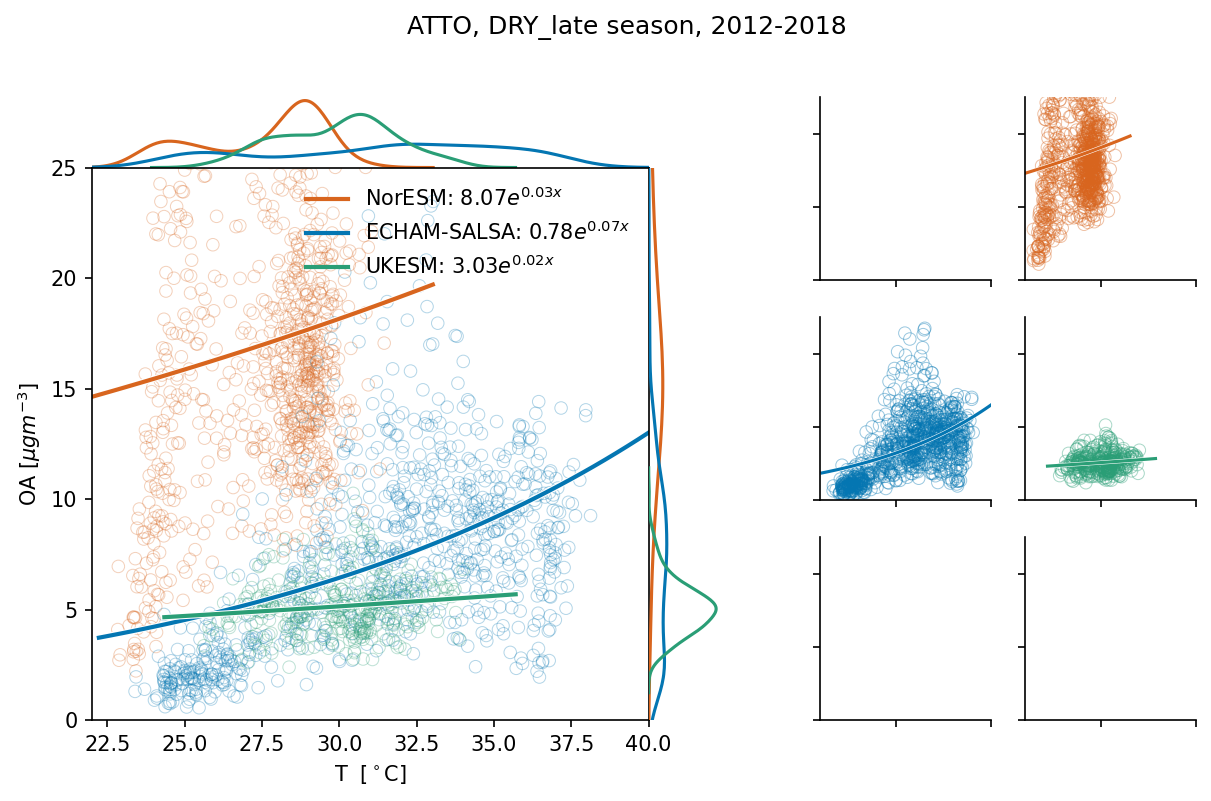

In [165]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
fig, ax, daxs, axs_extra = make_cool_grid3(ncols_extra=2, nrows_extra=3,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()
#ax = axsaxs_extra

## Settings
alpha_scatt = 0.3

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'


xlims = [22,40]
ylims = [0,25]


season='DRY_late'






# OBS: 

v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
mo = 'Observations'


df_s = df_joint_hyy#.loc['2012':'2014']
"""
mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],
                    zorder=-10,

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__'
               )
popt, pov, label, func = get_exp_fit_weight(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)
    
#ax.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}, eq. weight', linestyle='--')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)

"""

# NORESM: 
v_x = 'T_C'
v_y = 'OA'

for mo, ax_ex in zip(models, axs_extra[1:]):
    ca= dic_mod2case[mo]
    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_exp_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )


    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models:
    ca= dic_mod2case[mo]

    #mask_obs_ind_su = mask_obs_ind[mask_obs_ind.isin(dic_df_mod_case[mo][ca].index)]
    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()

    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)



for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)

fn = make_fn_scat(f'exp_fit1_{season}', v_x, v_y)
ax.legend(frameon=False)

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

In [166]:
case_mod

'OsloAero_intBVOC_f09_f09_mg17_fssp'

In [167]:
mo= 'NorESM'
ca = case_mod
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

(df_s['SOA']/df_s['OA']).plot()

KeyError: 'SOA'

In [ ]:
mo= 'NorESM'
ca = case_mod
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

(df_s['OA']).plot()

In [ ]:
mo= 'ECHAM-SALSA'
ca = case_name_echam
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

#(df_s['SOA']/df_s['OA']).plot()

df_s['OA'].plot()
df_s['OAG'].plot(alpha=.5)

In [ ]:
df_s.columns

In [ ]:
mo= 'ECHAM-SALSA'
ca = case_name_echam
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

#(df_s['SOA']/df_s['OA']).plot()

df_s['OA'].plot()
df_s['OAG'].plot(alpha=.5)

In [ ]:
mo= 'NorESM'
ca = case_mod
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]




seas = 'WET_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)


seas = 'WET_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)

plt.title('SOA/total OA')
plt.legend()

In [ ]:
mo= 'NorESM'
ca = case_mod
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]




seas = 'WET_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)


seas = 'WET_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)
plt.title('OA')

plt.legend()

In [ ]:
mo= 'NorESM'
ca = case_mod
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]




seas = 'WET_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


seas = 'WET_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


seas = 'DRY_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


seas = 'DRY_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


plt.legend()
plt.title('SOA')

In [ ]:
month_ma = select_months(df_s, season='WET_early')

_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot()

In [ ]:
month_ma = select_months(df_s, season='WET')

_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot()

In [ ]:
month_ma = select_months(df_s, season='DRY')

_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot()

### Residuals of fit

In [ ]:
import scipy

## N50

# Testing different fits

### Residuals of fit

# OA to number: 

## Dry season

### N50

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs, axs_extra = make_cool_grid3()
#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{50}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'DRY'
xlims = [.1,50]

ylims = [30,12000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N50'

ca ='OBS'
mo = 'Observations'
"""
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)

ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
"""

# NORESM: 
v_x = 'OA'

for mo, ax_ex in zip(models[:-1], axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max()
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim, num=200)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models[:-1]:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=True)
ax.set_yscale('log')
ax.set_xscale('log')

for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)
    ax_e.set_yscale('log')
    ax_e.set_xscale('log')

#ax.set_xscale('log')
fn = make_fn_scat(f'log_fit_{season}', v_x, v_y)

fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)




plt.show()

### N100

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs, axs_extra = make_cool_grid3()
#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{100}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'DRY'
xlims = [.1,50]

ylims = [30,10000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N100'

ca ='OBS'
mo = 'Observations'
"""
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)

ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
"""

# NORESM: 
v_x = 'OA'

for mo, ax_ex in zip(models[:-1], axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max()
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim, num=200)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models[:-1]:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=True)
ax.set_yscale('log')
ax.set_xscale('log')

for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)
    ax_e.set_yscale('log')
    ax_e.set_xscale('log')

#ax.set_xscale('log')
fn = make_fn_scat(f'log_fit_{season}', v_x, v_y)

fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)




plt.show()

### N200

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs, axs_extra = make_cool_grid3()
#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{200}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'DRY'
xlims = [.1,50]

ylims = [1,10000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N200'

ca ='OBS'
mo = 'Observations'
"""
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)

ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
"""

# NORESM: 
v_x = 'OA'

for mo, ax_ex in zip(models[:-1], axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max()
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim, num=200)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models[:-1]:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=True)
ax.set_yscale('log')
ax.set_xscale('log')

for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)
    ax_e.set_yscale('log')
    ax_e.set_xscale('log')

#ax.set_xscale('log')
fn = make_fn_scat(f'log_fit_{season}', v_x, v_y)

fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)




plt.show()

## WET season

### N50

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs, axs_extra = make_cool_grid3()
#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{50}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET'
xlims = [.1,50]

ylims = [30,12000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N50'

ca ='OBS'
mo = 'Observations'

"""
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)

ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
"""

# NORESM: 
v_x = 'OA'

for mo, ax_ex in zip(models[:-1], axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max()
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim, num=200)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models[:-1]:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=True)
ax.set_yscale('log')
ax.set_xscale('log')

for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)
    ax_e.set_yscale('log')
    ax_e.set_xscale('log')

#ax.set_xscale('log')
fn = make_fn_scat(f'log_fit_{season}', v_x, v_y)

fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)




plt.show()

### N100

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs, axs_extra = make_cool_grid3()
#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{100}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET'
xlims = [.1,50]

ylims = [30,10000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N100'

ca ='OBS'
mo = 'Observations'
"""
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)

ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
"""

# NORESM: 
v_x = 'OA'

for mo, ax_ex in zip(models[:-1], axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max()
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim, num=200)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models[:-1]:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=True)
ax.set_yscale('log')
ax.set_xscale('log')

for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)
    ax_e.set_yscale('log')
    ax_e.set_xscale('log')

#ax.set_xscale('log')
fn = make_fn_scat(f'log_fit_{season}', v_x, v_y)

fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)




plt.show()

### N200

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs, axs_extra = make_cool_grid3()
#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{200}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET'
xlims = [0,15]

ylims = [0,450]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N200'

ca ='OBS'
mo = 'Observations'
"""
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)

ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
"""

# NORESM: 
v_x = 'OA'

for mo, ax_ex in zip(models[:-1], axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    popt, pov, label, func = get_exp_fit_wc(df_s,v_x,v_y, return_func=True)
    x = np.linspace(*xlims)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models[:-1]:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=True)


for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)

#ax.set_xscale('log')
fn = make_fn_scat(f'log_fit_{season}', v_x, v_y)

fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs, axs_extra = make_cool_grid3()
#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{200}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'DRY'
xlims = [0,50]

ylims = [0,1000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N200'

ca ='OBS'
mo = 'Observations'
"""
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)

ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
"""

# NORESM: 
v_x = 'OA'

for mo, ax_ex in zip(models[:-1], axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    x = np.linspace(*xlims)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models[:-1]:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=True)


for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)

#ax.set_xscale('log')
fn = make_fn_scat(f'log_fit_{season}', v_x, v_y)

fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

## Dry season early

### N50

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs, axs_extra = make_cool_grid3()
#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{50}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'DRY_early'
xlims = [.1,50]

ylims = [30,12000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N50'

ca ='OBS'
mo = 'Observations'
"""
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)

ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
"""

# NORESM: 
v_x = 'OA'

for mo, ax_ex in zip(models[:-1], axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max()
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim, num=200)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models[:-1]:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=True)
ax.set_yscale('log')
ax.set_xscale('log')

for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)
    ax_e.set_yscale('log')
    ax_e.set_xscale('log')

#ax.set_xscale('log')
fn = make_fn_scat(f'log_fit_{season}', v_x, v_y)

fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)




plt.show()

### N100

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs, axs_extra = make_cool_grid3()
#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{100}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'DRY_early'
xlims = [.1,50]

ylims = [30,10000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N100'

ca ='OBS'
mo = 'Observations'
"""
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)

ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
"""

# NORESM: 
v_x = 'OA'

for mo, ax_ex in zip(models[:-1], axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max()
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim, num=200)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models[:-1]:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=True)
ax.set_yscale('log')
ax.set_xscale('log')

for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)
    ax_e.set_yscale('log')
    ax_e.set_xscale('log')

#ax.set_xscale('log')
fn = make_fn_scat(f'log_fit_{season}', v_x, v_y)

fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)




plt.show()

### N200

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs, axs_extra = make_cool_grid3()
#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{200}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'DRY_early'
xlims = [.1,50]

ylims = [1,10000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N200'

ca ='OBS'
mo = 'Observations'
"""
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)

ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
"""

# NORESM: 
v_x = 'OA'

for mo, ax_ex in zip(models[:-1], axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max()
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim, num=200)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models[:-1]:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=True)
ax.set_yscale('log')
ax.set_xscale('log')

for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)
    ax_e.set_yscale('log')
    ax_e.set_xscale('log')

#ax.set_xscale('log')
fn = make_fn_scat(f'log_fit_{season}', v_x, v_y)

fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)




plt.show()

## Dry late

### N50

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs, axs_extra = make_cool_grid3()
#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{50}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'DRY_late'
xlims = [.1,50]

ylims = [30,12000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N50'

ca ='OBS'
mo = 'Observations'
"""
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)

ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
"""

# NORESM: 
v_x = 'OA'

for mo, ax_ex in zip(models[:-1], axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max()
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim, num=200)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models[:-1]:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=True)
ax.set_yscale('log')
ax.set_xscale('log')

for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)
    ax_e.set_yscale('log')
    ax_e.set_xscale('log')

#ax.set_xscale('log')
fn = make_fn_scat(f'log_fit_{season}', v_x, v_y)

fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)




plt.show()

### N100

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs, axs_extra = make_cool_grid3()
#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{100}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'DRY_late'
xlims = [.1,50]

ylims = [30,10000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N100'

ca ='OBS'
mo = 'Observations'
"""
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)

ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
"""

# NORESM: 
v_x = 'OA'

for mo, ax_ex in zip(models[:-1], axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max()
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim, num=200)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models[:-1]:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=True)
ax.set_yscale('log')
ax.set_xscale('log')

for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)
    ax_e.set_yscale('log')
    ax_e.set_xscale('log')

#ax.set_xscale('log')
fn = make_fn_scat(f'log_fit_{season}', v_x, v_y)

fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)




plt.show()

### N200

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs, axs_extra = make_cool_grid3()
#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{200}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'DRY_late'
xlims = [.1,50]

ylims = [1,10000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N200'

ca ='OBS'
mo = 'Observations'
"""
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)

ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
"""

# NORESM: 
v_x = 'OA'

for mo, ax_ex in zip(models[:-1], axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max()
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim, num=200)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models[:-1]:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=True)
ax.set_yscale('log')
ax.set_xscale('log')

for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)
    ax_e.set_yscale('log')
    ax_e.set_xscale('log')

#ax.set_xscale('log')
fn = make_fn_scat(f'log_fit_{season}', v_x, v_y)

fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)




plt.show()

## WET early

### N50

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs, axs_extra = make_cool_grid3()
#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{50}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET_early'
xlims = [.1,50]

ylims = [30,12000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N50'

ca ='OBS'
mo = 'Observations'
"""
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)

ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
"""

# NORESM: 
v_x = 'OA'

for mo, ax_ex in zip(models[:-1], axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max()
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim, num=200)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models[:-1]:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=True)
ax.set_yscale('log')
ax.set_xscale('log')

for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)
    ax_e.set_yscale('log')
    ax_e.set_xscale('log')

#ax.set_xscale('log')
fn = make_fn_scat(f'log_fit_{season}', v_x, v_y)

fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)




plt.show()

### N100

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs, axs_extra = make_cool_grid3()
#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{100}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'DRY'
xlims = [.1,50]

ylims = [30,10000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N100'

ca ='OBS'
mo = 'Observations'
"""
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)

ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
"""

# NORESM: 
v_x = 'OA'

for mo, ax_ex in zip(models[:-1], axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max()
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim, num=200)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models[:-1]:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=True)
ax.set_yscale('log')
ax.set_xscale('log')

for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)
    ax_e.set_yscale('log')
    ax_e.set_xscale('log')

#ax.set_xscale('log')
fn = make_fn_scat(f'log_fit_{season}', v_x, v_y)

fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)




plt.show()

### N200

In [ ]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
fig, ax, daxs, axs_extra = make_cool_grid3()
#ax = axs

## Settings
alpha_scatt = 0.2

ylab = r'N$_{200}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'DRY'
xlims = [.1,50]

ylims = [1,10000]

# OBS: 
v_x = 'OA (microgram m^-3)'
v_y = 'N200'

ca ='OBS'
mo = 'Observations'
"""
df_s = df_joint_hyy#.loc['2012':'2014']

mask_obs_ind = df_s[[v_x,v_y]].notna().index

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = ax,
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

sns.scatterplot(x=v_x,
                y=v_y, 
                data = df_s, 
                color=cdic_model[mo], 
                alpha=alpha_scatt, 
                ax = axs_extra[0],
                facecolor='none',
                edgecolor=cdic_model[mo],

                label='__nolegend__')

popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
x = np.linspace(*xlims)

ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    
ax.plot(x, func(x, *popt), c=cdic_model[mo], linewidth=2,label=f'{mo}: {label}')
axs_extra[0].plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}')

axs_extra[0].plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}')

    
    

#fig.suptitle('Observations')
sns.kdeplot(
    x= df_s[v_x], 
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['x'],
)

sns.kdeplot(
    y=df_s[v_y],
    color=cdic_model[mo], 
    label=mo,
    ax = daxs['y'],
)
"""

# NORESM: 
v_x = 'OA'

for mo, ax_ex in zip(models[:-1], axs_extra[1:]):
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt, 
                    label='__nolegend__',
                    ax = ax,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )
    sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    facecolor='none',
                    edgecolor=cdic_model[mo]
                    
                    
                   )

    popt, pov, label, func = get_linear_fit(df_s,v_x,v_y, return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max()
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim, num=200)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')
    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )

    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )

    #     label='fit: %5.3f exp( %5.3f x) +  %5.3f' % tuple(popt))
    

    
    
    
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
fig.suptitle(f'ATTO, {season} season, 2012-2018')


# 
for mo in models[:-1]:
    ca= dic_mod2case[mo]

    df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind]

    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()


    sns.kdeplot(#x=v_x,
                    x= df_s[v_x], 
                    color=cdic_model[mo], 
                    label=mo,
                    ax = daxs['x'],
                    
                   )

    sns.kdeplot(#x=v_x,
                    
        y=df_s[v_y],
        #vertical=True,
                    color=cdic_model[mo], 
                    #alpha=alpha_scatt, 
                    label=mo,
                    ax = daxs['y'],
                    
                   )

ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.legend(frameon=True)
ax.set_yscale('log')
ax.set_xscale('log')

for ax_e in axs_extra:
    ax_e.set_xlabel('')
    ax_e.set_ylabel('')
    ax_e.set_ylim(ax.get_ylim())
    ax_e.set_xlim(ax.get_xlim())
    #ax_e.set_xticklabels
    ax_e.axes.xaxis.set_ticklabels([])
    ax_e.axes.yaxis.set_ticklabels([])
    #ax_e.axes.yaxis.set_visible(False)

    sns.despine(ax = ax_e)
    ax_e.set_yscale('log')
    ax_e.set_xscale('log')

#ax.set_xscale('log')
fn = make_fn_scat(f'log_fit_{season}', v_x, v_y)

fig.tight_layout()

fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)




plt.show()